In [1]:
from Transforms import AddGaussianSNR, Shift, TimeMask, Fade, Gain, Reverse, Normal
import torch

In [2]:
device = torch.device("cuda")
x = torch.linspace(0, 20, 1000, device=device)
y = 3 * torch.sin(2*x) * torch.exp(-x*0.2)

In [3]:
import matplotlib.pyplot as plt

def plot(x,y, linewidth=1):
    plt.figure(figsize=(15,9))
    plt.style.use('seaborn')
    fig, axs = plt.subplots(4,2)

    noise = AddGaussianSNR(y).cpu()
    shift = Shift(y).cpu()
    timemask = TimeMask(y).cpu()
    fade = Fade(y).cpu()
    gain = Gain(y).cpu()
    reverse = Reverse(y).cpu()
    normal = Normal(y).cpu()
    x = x.cpu()
    y = y.cpu()

    # original
    axs[0,0].plot(x,y,linewidth=linewidth,c='gray')
    axs[0,0].set_title('Original')
    
    # GaussianSNR
    axs[0,1].plot(x,y,linewidth=linewidth,c='gray')
    axs[0,1].plot(x,noise,linewidth=linewidth,c='navy')
    axs[0,1].set_title('Random Gaussian noise')

    # Shift
    axs[1,0].plot(x,y,linewidth=linewidth,c='gray')
    axs[1,0].plot(x,shift,linewidth=linewidth,c='navy')
    axs[1,0].set_title('Shift')

    # Time mask
    axs[1,1].plot(x,y,linewidth=linewidth,c='gray')
    axs[1,1].plot(x,timemask,linewidth=linewidth,c='navy')
    axs[1,1].set_title('Time mask')

    # Fade
    axs[2,0].plot(x,y,linewidth=linewidth,c='gray')
    axs[2,0].plot(x,fade,linewidth=linewidth,c='navy')
    axs[2,0].set_title('Fade')

    # Gain
    axs[2,1].plot(x,y,linewidth=linewidth,c='gray')
    axs[2,1].plot(x,gain,linewidth=linewidth,c='navy')
    axs[2,1].set_title('Gain')

    # Reverse
    axs[3,0].plot(x,y,linewidth=linewidth,c='gray')
    axs[3,0].plot(x,reverse,linewidth=linewidth,c='navy')
    axs[3,0].set_title('Reverse')

    # Normal
    axs[3,1].plot(x,y,linewidth=linewidth,c='gray')
    axs[3,1].plot(x,normal,linewidth=linewidth,c='navy')
    axs[3,1].set_title('Normalization')

    plt.grid(visible=True)
    plt.tight_layout()
    plt.savefig("./figs/augmentations.png", dpi=300)

<Figure size 1080x648 with 0 Axes>

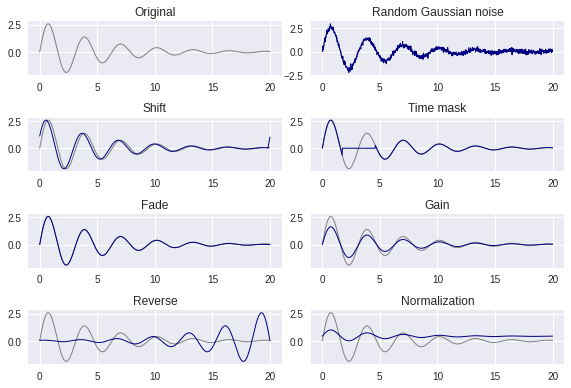

In [4]:
plot(x,y)